# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from citipy import citipy
import itertools 
import pandas as pd
import numpy as np
import requests
import gmaps
import random
import time
import os

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [2]:
# Generate 5000 random Latitude and Longitude coordinates 

lat_list = []
lon_list = []

for i in range(0,5000):
    lat = random.randint(-90,90)
    lon = random.randint(-180,180)
    lat_list.append(int(lat))
    lon_list.append(int(lon))

In [3]:
# Use citipy to match the lat, lon coordinates to a nearby city. Append results to empty list

city_list = []

for x,i in zip(lat_list,lon_list):
    try:
        city = citipy.nearest_city(lat_list[x],lon_list[i])
        city_name = city.city_name
        city_list.append(city_name)
    except:
        print("No City Found")

print(city_list)

['huarmey', 'barrow', 'meulaboh', 'nome', 'ales', 'korla', 'georgetown', 'hermanus', 'khatanga', 'havelock', 'saint-philippe', 'bredasdorp', 'praia da vitoria', 'hobart', 'rikitea', 'fecamp', 'tautira', 'mataura', 'chuy', 'punta arenas', 'port-cartier', 'srednekolymsk', 'souillac', 'busselton', 'mataura', 'airai', 'hilo', 'ribeira grande', 'fort-shevchenko', 'port alfred', 'khonuu', 'new norfolk', 'darhan', 'avarua', 'east london', 'samarina', 'deer lake', 'cape town', 'daru', 'rikitea', 'mabai', 'avarua', 'vikyrovice', 'springdale', 'atuona', 'puerto ayora', 'tuatapere', 'falealupo', 'ushuaia', 'enid', 'avarua', 'salalah', 'atuona', 'vila franca do campo', 'anadyr', 'barrow', 'richards bay', 'atuona', 'ponta do sol', 'arlit', 'ushuaia', 'shimoda', 'qaanaaq', 'qaanaaq', 'sontra', 'hambantota', 'vaini', 'avarua', 'rikitea', 'alofi', 'albany', 'tilichiki', 'haines junction', 'butaritari', 'urumqi', 'mataura', 'barawe', 'albany', 'myitkyina', 'meulaboh', 'rikitea', 'hithadhoo', 'jumla', '

In [4]:
# Return list count value
len(city_list)

5000

In [5]:
# Remove duplicate Cities prior to API call for efficiency purposes
temp_list = []

for i in city_list:
    if i not in temp_list:
        temp_list.append(i)

clean_city_list = temp_list

# Return clean list count value and make sure it is over 500
len(clean_city_list)

1312

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Build query URL

units = "imperial"
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

In [7]:
# ***NOTE*** API processing takes aobut 6 minutes to complete
# Create empty lists for API call data to append to
city_final_list = []
temp_list = []
lat_list = []
lon_list = []
temp_max_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []

# Print out that processing is beginning
print("Begin Data Processing")
print("---------------------")

# Loop through the city list without duplicates and pull necessary fields from API, append data to lists above

for city in clean_city_list:
    try:
        response = requests.get(base_url + city).json()
        print(f"Processing data for City Name: {city}, City ID: {response['sys']['id']}")
        city_final_list.append(city)
        temp_list.append(response['main']['temp'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        temp_max_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloud_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
    except:
        print("Error: City Information Not Found")

# Print out processing is completed
print("---------------------------")
print("Data Processing is Complete")

Begin Data Processing
---------------------
Error: City Information Not Found
Processing data for City Name: barrow, City ID: 7649
Error: City Information Not Found
Processing data for City Name: nome, City ID: 7770
Processing data for City Name: ales, City ID: 6599
Error: City Information Not Found
Processing data for City Name: georgetown, City ID: 9429
Processing data for City Name: hermanus, City ID: 2006131
Error: City Information Not Found
Processing data for City Name: havelock, City ID: 5098
Processing data for City Name: saint-philippe, City ID: 2127
Processing data for City Name: bredasdorp, City ID: 1966
Processing data for City Name: praia da vitoria, City ID: 6895
Processing data for City Name: hobart, City ID: 9545
Error: City Information Not Found
Processing data for City Name: fecamp, City ID: 6533
Processing data for City Name: tautira, City ID: 7318
Processing data for City Name: mataura, City ID: 2008959
Error: City Information Not Found
Processing data for City Name

Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: talcahuano, City ID: 8499
Error: City Information Not Found
Processing data for City Name: saint-joseph, City ID: 2127
Error: City Information Not Found
Processing data for City Name: fortuna, City ID: 4127
Error: City Information Not Found
Processing data for City Name: thomasville, City ID: 4031
Error: City Information Not Found
Processing data for City Name: san patricio, City ID: 5629
Error: City Information Not Found
Processing data for City Name: ilulissat, City ID: 165
Processing data for City Name: fukue, City ID: 7986
Processing data for City Name: redlands, City ID: 5778
Processing data for City Name: moose factory, City ID: 860
Processing data for City Name: valleyview, City ID: 723
Error: City Information Not Found
Processing data for City Name: alice springs, City ID: 9483
Pr

Processing data for City Name: hacienda heights, City ID: 4154
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: kamenka, City ID: 2021293
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: chapais, City ID: 859
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: hervey bay, City ID: 9501
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: torbay, City ID: 998
Processing data for City Name: najran,

Processing data for City Name: westerland, City ID: 1312
Processing data for City Name: balykshi, City ID: 8836
Processing data for City Name: anamur, City ID: 7014
Error: City Information Not Found
Processing data for City Name: aklavik, City ID: 1029
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: moissac, City ID: 6455
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: tumut, City ID: 9598
Error: City Information Not Found
Processing data for City Name: fastiv, City ID: 8903
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: penzance, City ID: 1393
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: santa marta, City ID: 8624
Processing data for City Name: ambon, City ID: 9361
Processing data

Error: City Information Not Found
Processing data for City Name: hillsborough, City ID: 5817
Processing data for City Name: alghero, City ID: 6717
Processing data for City Name: tsuyama, City ID: 8018
Error: City Information Not Found
Processing data for City Name: manicore, City ID: 8397
Processing data for City Name: belmonte, City ID: 8422
Processing data for City Name: neokhorion, City ID: 18806
Processing data for City Name: comodoro rivadavia, City ID: 8284
Processing data for City Name: hearst, City ID: 402
Processing data for City Name: khorramshahr, City ID: 7439
Processing data for City Name: malartic, City ID: 950
Processing data for City Name: abrau-dyurso, City ID: 8962
Processing data for City Name: chichibu, City ID: 8073
Error: City Information Not Found
Processing data for City Name: matagami, City ID: 866
Error: City Information Not Found
Processing data for City Name: ferme-neuve, City ID: 371
Error: City Information Not Found
Processing data for City Name: nelson ba

Processing data for City Name: gallup, City ID: 4279
Processing data for City Name: carballo, City ID: 6403
Error: City Information Not Found
Processing data for City Name: jiaonan, City ID: 9657
Processing data for City Name: rapid valley, City ID: 5623
Processing data for City Name: chilliwack, City ID: 582
Processing data for City Name: cairns, City ID: 9490
Processing data for City Name: baker city, City ID: 3453
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: manica, City ID: 6569
Processing data for City Name: dumbraveni, City ID: 6925
Processing data for City Name: bracebridge, City ID: 888
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: abay, City ID: 8827
Processing data for City Name: barbate, City ID: 7026
Processing data for City Name: corinto, City ID: 2039794
Error: City Information Not Found
Processing data for City Name: roald, City ID: 1602
Processing data for City Nam

Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: terrace bay, City ID: 185
Error: City Information Not Found
Processing data for City Name: chickasha, City ID: 3623
Processing data for City Name: paso de los toros, City ID: 8695
Error: City Information Not Found
Processing data for City Name: culpeper, City ID: 3628
Processing data for City Name: pecos, City ID: 5325
Processing data for City Name: palmer, City ID: 3598
Processing data for City Name: dubovka, City ID: 8973
Error: City Information Not Found
Processing data for City Name: rosarito, City ID: 5796
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: sistranda, City ID: 1647
Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: lakes entrance, City ID: 2011895
Processing data for City Name: lewistown, City ID: 5732
Erro

Error: City Information Not Found
Error: City Information Not Found
Processing data for City Name: spearfish, City ID: 5898
Error: City Information Not Found
---------------------------
Data Processing is Complete


In [8]:
# print out the lists to see data
print(city_final_list)
print(temp_list)
print(lat_list)
print(lon_list)
print(temp_max_list)
print(humidity_list)
print(cloud_list)
print(wind_list)
print(country_list)
print(date_list)

['barrow', 'nome', 'ales', 'georgetown', 'hermanus', 'havelock', 'saint-philippe', 'bredasdorp', 'praia da vitoria', 'hobart', 'fecamp', 'tautira', 'mataura', 'punta arenas', 'port-cartier', 'souillac', 'busselton', 'hilo', 'new norfolk', 'avarua', 'east london', 'samarina', 'deer lake', 'cape town', 'vikyrovice', 'springdale', 'puerto ayora', 'tuatapere', 'ushuaia', 'enid', 'salalah', 'vila franca do campo', 'anadyr', 'ponta do sol', 'shimoda', 'sontra', 'hambantota', 'vaini', 'alofi', 'albany', 'haines junction', 'urumqi', 'socorro', 'kapaa', 'mount gambier', 'yellowknife', 'thompson', 'carnarvon', 'bethel', 'kununurra', 'anloga', 'hasaki', 'nikolskoye', 'norman wells', 'cabot', 'touros', 'sitka', 'sengiley', 'goderich', 'jamestown', 'oussouye', 'vila velha', 'big rapids', 'bluff', 'saint-pierre', 'geraldton', 'swellendam', 'waipawa', 'longyearbyen', 'lasa', 'mahebourg', 'victoria', 'ancud', 'port elizabeth', 'pontal do parana', 'florence', 'brownwood', 'pisco', 'elizabeth city', 'ma

In [9]:
# Check to make sure data for at least 500 cities were appended
len(city_final_list)

592

In [13]:
# Starter Code Example

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a dictionary of all the pulled data
dict = {'City Name': city_final_list, 
        'Current Temp': temp_list, 
        'Latitude': lat_list,
        'Longitude': lon_list,
        'Max Temp': temp_max_list,
        'Humidity': humidity_list,
        'Cloudiness': cloud_list,
        'Wind': wind_list,
        'Country': country_list,
        'Date': date_list      
       }  
# Create dataframe from dictionary
city_weather_df = pd.DataFrame(dict) 

# Create CSV of Data frame
city_weather_df.to_csv('../Resources/city_weather_data.csv') 

In [12]:
# Display dataframe
city_weather_df

,City Name,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,barrow,19.40,71.2906,-156.7887,19.40,86,90,12.66,US,1619926543
1,nome,26.94,64.5011,-165.4064,28.40,69,40,13.80,US,1619926394
2,ales,44.80,44.1333,4.0833,46.99,87,0,6.91,FR,1619926544
3,georgetown,87.33,5.4112,100.3354,89.60,79,20,8.05,MY,1619926545
4,hermanus,57.00,-34.4187,19.2345,57.00,74,85,1.01,ZA,1619926518
...,...,...,...,...,...,...,...,...,...,...
587,glendive,59.29,47.1053,-104.7125,60.80,27,1,9.22,US,1619926908
588,damavand,69.28,35.7178,52.0650,69.80,30,40,6.91,IR,1619926909
589,martin,76.64,27.0837,-80.4164,80.01,83,1,5.75,US,1619926909
590,marsassoum,71.60,12.8275,-15.9806,71.60,88,0,4.61,SN,1619926909


In [13]:
city_weather_df.describe()

,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,58.442922,24.981622,-14.016684,59.579932,70.479730,44.180743,7.404054,1.619927e+09
std,16.194731,31.489700,88.230120,16.225105,21.908661,37.780729,5.191660,1.267501e+02
min,12.200000,-54.800000,-175.200000,12.200000,1.000000,0.000000,0.720000,1.619926e+09
25%,46.180000,5.396175,-82.472500,46.990000,55.000000,1.000000,3.787500,1.619927e+09
50%,57.200000,36.769250,-16.117600,59.000000,75.000000,40.000000,5.815000,1.619927e+09
75%,71.902500,48.788675,40.421100,73.400000,88.000000,77.750000,9.220000,1.619927e+09
max,96.800000,78.218600,177.483300,96.800000,100.000000,100.000000,43.730000,1.619927e+09


In [16]:
# starter code example

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Check to see if there are any cities with humidity > 100
humidity_over_100_list = city_weather_df.loc[city_weather_df["Humidity"] > 100, :]
humidity_over_100_list.count()

City Name       0
Current Temp    0
Latitude        0
Longitude       0
Max Temp        0
Humidity        0
Cloudiness      0
Wind            0
Country         0
Date            0
dtype: int64

In [ ]:
# No Cities found with humidity > 100, skip following steps

In [16]:
# Come back and do section above at end
clean_city_data = city_weather_df
clean_city_data

,City Name,Current Temp,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind,Country,Date
0,barrow,19.40,71.2906,-156.7887,19.40,86,90,12.66,US,1619926543
1,nome,26.94,64.5011,-165.4064,28.40,69,40,13.80,US,1619926394
2,ales,44.80,44.1333,4.0833,46.99,87,0,6.91,FR,1619926544
3,georgetown,87.33,5.4112,100.3354,89.60,79,20,8.05,MY,1619926545
4,hermanus,57.00,-34.4187,19.2345,57.00,74,85,1.01,ZA,1619926518
...,...,...,...,...,...,...,...,...,...,...
587,glendive,59.29,47.1053,-104.7125,60.80,27,1,9.22,US,1619926908
588,damavand,69.28,35.7178,52.0650,69.80,30,40,6.91,IR,1619926909
589,martin,76.64,27.0837,-80.4164,80.01,83,1,5.75,US,1619926909
590,marsassoum,71.60,12.8275,-15.9806,71.60,88,0,4.61,SN,1619926909


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

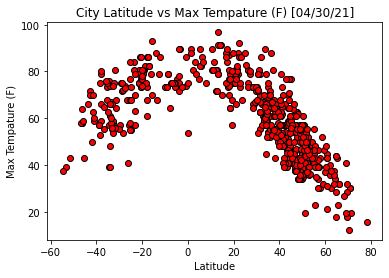

In [17]:
# Generate scatter of Latitude vs. Max Temp 
city_max_temp_list = clean_city_data['Max Temp'].tolist()
city_lat_list = clean_city_data['Latitude'].tolist()

plt.scatter(city_lat_list, city_max_temp_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Tempature (F) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")

plt.savefig('../Image Output/lat_vs_max_temp.jpg')

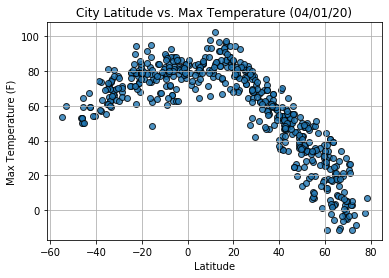

In [10]:
# Starter Code Example

Analysis: Tempatures are highest near the Equator. Further, southern latitudes have higher max temps than nothern latitudes.

## Latitude vs. Humidity Plot

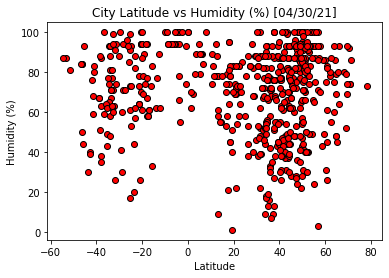

In [18]:
# Generate scatter plot of Lat vs. Humidity
city_humidity_list = clean_city_data['Humidity'].tolist()

plt.scatter(city_lat_list, city_humidity_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity (%) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('../Image Output/lat_vs_humidity.jpg')

Analysis:

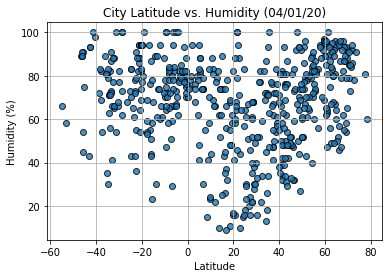

In [11]:
#Starter Code Example

## Latitude vs. Cloudiness Plot

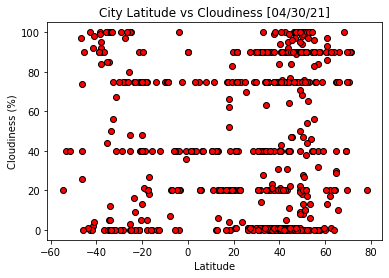

In [20]:
# Scatter plot of Latitude vs. Cloudiness
city_cloud_list = clean_city_data['Cloudiness'].tolist()

plt.scatter(city_lat_list, city_cloud_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../Image Output/lat_vs_cloudiness.jpg')

Analysis: 

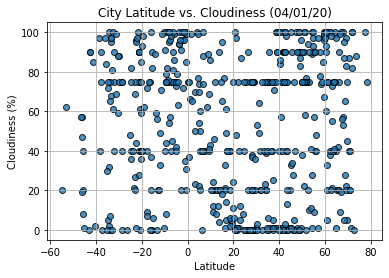

In [12]:
#Starter Code Example

## Latitude vs. Wind Speed Plot

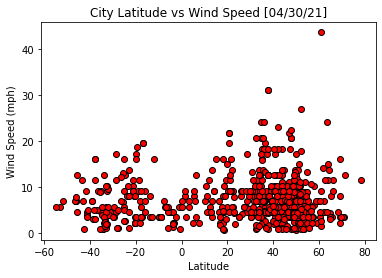

In [21]:
# Scatter plot of Lat vs. Wind Speed
city_wind_list = clean_city_data['Wind'].tolist()

plt.scatter(city_lat_list, city_wind_list, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../Image Output/lat_vs_wind_speed.jpg')

Analysis:

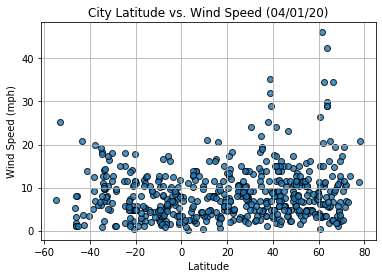

In [13]:
# Starter Code Example

## Linear Regression

In [23]:
# Create new dataframes for North and South Hemispheres
north_hem_df = city_weather_df.loc[city_weather_df["Latitude"] >= 0, :]
south_hem_df = city_weather_df.loc[city_weather_df["Latitude"] < 0, :]

In [28]:
# Create lists of the lat cooridnates
north_hem_lat_list = north_hem_df['Latitude'].tolist()
south_hem_lat_list = south_hem_df['Latitude'].tolist()

In [29]:
# create Max Temp Lists and convert to int
north_hem_max_temp_list = north_hem_df['Max Temp'].tolist()
north_hem_max_temp_int_list = []
south_hem_max_temp_list = south_hem_df['Max Temp'].tolist()
south_hem_max_temp_int_list = []

for value in north_hem_max_temp_list:
    try:
        north_hem_max_temp_int_list.append(int(value))
    except ValueError:
        continue
print(north_hem_max_temp_int_list)

[19, 28, 46, 89, 54, 62, 41, 35, 75, 30, 37, 45, 66, 66, 84, 60, 17, 57, 68, 44, 86, 48, 44, 57, 78, 78, 30, 23, 50, 82, 68, 37, 42, 68, 46, 46, 59, 57, 71, 64, 15, 46, 87, 57, 62, 55, 39, 70, 80, 53, 55, 55, 66, 91, 42, 46, 53, 51, 73, 41, 60, 68, 19, 41, 80, 35, 62, 78, 51, 77, 66, 53, 64, 66, 42, 32, 37, 39, 69, 30, 42, 64, 78, 48, 44, 32, 73, 60, 39, 69, 46, 87, 80, 33, 73, 48, 42, 66, 51, 66, 48, 78, 48, 42, 30, 66, 32, 86, 23, 80, 75, 53, 35, 46, 60, 53, 12, 62, 48, 33, 39, 73, 44, 64, 80, 59, 55, 57, 66, 50, 39, 45, 64, 63, 89, 50, 57, 55, 48, 51, 77, 39, 80, 55, 66, 68, 54, 80, 46, 37, 78, 43, 33, 80, 42, 73, 55, 51, 55, 50, 37, 39, 77, 44, 17, 36, 59, 78, 79, 35, 45, 30, 73, 64, 51, 68, 71, 75, 50, 53, 60, 28, 53, 55, 42, 44, 62, 60, 26, 42, 55, 37, 84, 87, 46, 35, 37, 50, 68, 39, 55, 66, 80, 87, 57, 86, 51, 42, 39, 77, 42, 80, 66, 46, 66, 53, 46, 50, 55, 60, 57, 37, 45, 80, 75, 52, 55, 43, 50, 48, 62, 37, 52, 51, 60, 33, 87, 54, 37, 75, 41, 46, 80, 50, 88, 64, 57, 46, 59, 53,

In [30]:
south_hem_max_temp_list = south_hem_df['Max Temp'].tolist()
south_hem_max_temp_int_list = []

for value in south_hem_max_temp_list:
    try:
        south_hem_max_temp_int_list.append(int(value))
    except ValueError:
        continue
print(south_hem_max_temp_int_list)

[57, 75, 39, 71, 86, 57, 39, 73, 66, 70, 80, 57, 61, 73, 57, 37, 78, 80, 66, 73, 93, 75, 75, 57, 75, 71, 39, 62, 73, 50, 48, 57, 68, 86, 59, 73, 86, 86, 82, 55, 75, 84, 64, 63, 42, 86, 80, 73, 53, 84, 55, 89, 78, 77, 59, 53, 60, 77, 80, 75, 73, 64, 77, 71, 73, 77, 66, 80, 57, 75, 89, 75, 57, 73, 73, 57, 57, 78, 68, 57, 72, 55, 66, 73, 57, 42, 75, 73, 69, 59, 73, 78, 64, 68, 75, 68, 62, 75, 75, 70, 55, 78, 75, 41, 55, 75, 64, 82, 78, 75, 75, 75, 68, 75, 87, 55, 78, 78, 59, 66, 68, 68, 78, 79, 73, 53, 80, 80, 86, 73, 86, 69, 66, 57, 60, 55, 60, 82, 73]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

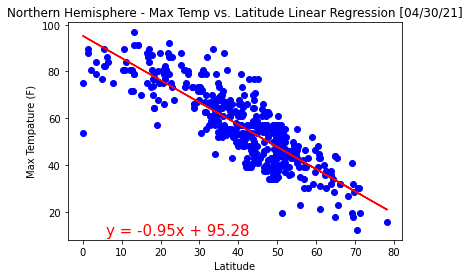

In [31]:
# create scatter plot and linear regression for Northern Hem max temp vs. latitude
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")

plt.savefig('../Image Output/north_hem_lat_vs_max_temp.jpg')

plt.show()

Analysis:

The r-value is: 0.46937863826630627


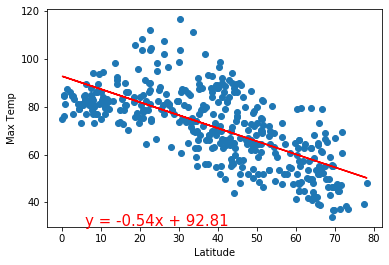

In [25]:
# Starter Code Example

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

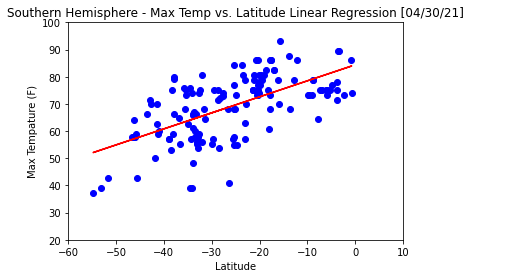

In [33]:
# create scatter plot and linear regression for Southern Hem max temp vs. latitude
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Max Tempature (F)")
plt.xlim([-60, 10])
plt.ylim([20,100])
plt.savefig('../Image Output/south_hem_lat_vs_max_temp.jpg')

plt.show()

Analysis:

The r-value is: 0.6082708688906918


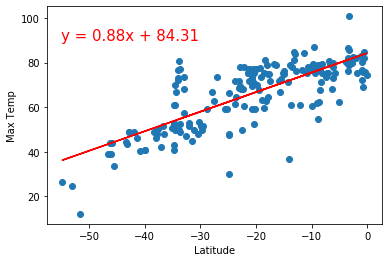

In [26]:
# Starter code example

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

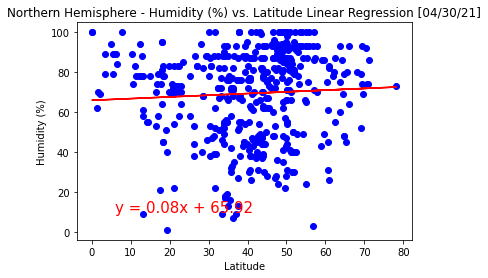

In [34]:
# create scatter plot and linear regression for Northern Hem Humidity vs. latitude
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('../Image Output/north_hem_lat_vs_humidity.jpg')

plt.show()

Analysis:

The r-value is: 0.000543987878808455


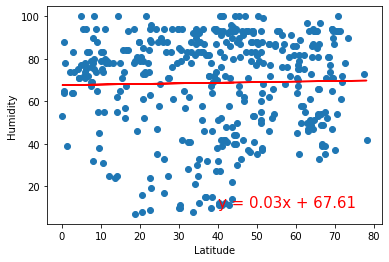

In [27]:
# Starter code example

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

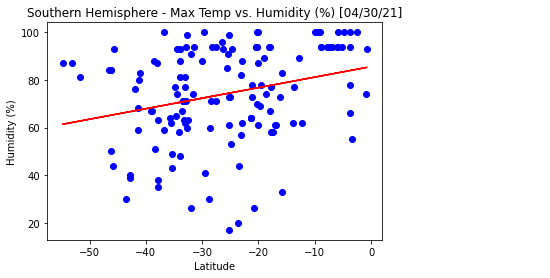

In [35]:
# create scatter plot and linear regression for Southern Hem Humidity vs. latitude
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Humidity (%) [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.xlim([-60, 10])
# plt.ylim([20,100])
plt.savefig('../Image Output/south_hem_lat_vs_humidity.jpg')

plt.show()

Analysis:

The r-value is: 0.014985174297345524


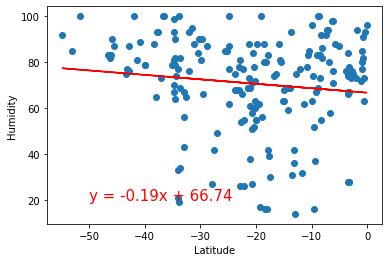

In [28]:
# starter code example

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

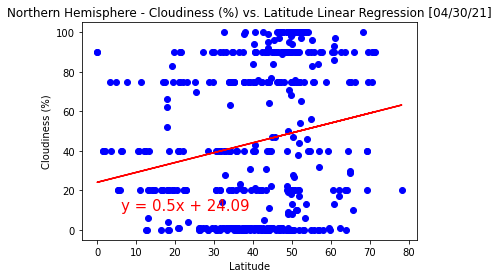

In [39]:
# create scatter plot and linear regression for Northern Hem Cloudiness vs. latitude 
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../Image Output/north_hem_lat_vs_cloud.jpg')

plt.show()

Analysis:

The r-value is: 0.0020898727664228514


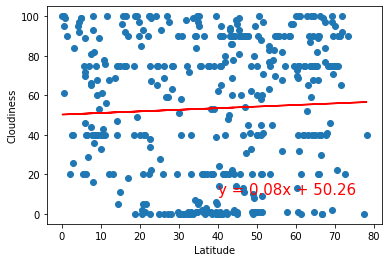

In [29]:
# Starter code example

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

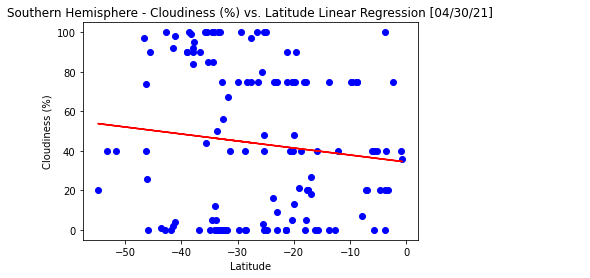

In [40]:
# create scatter plot and linear regression for Southern Hem Cloudiness vs. latitude 
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../Image Output/south_hem_lat_vs_cloud.jpg')

plt.show()

Analysis: 

The r-value is: 0.0035263772085582894


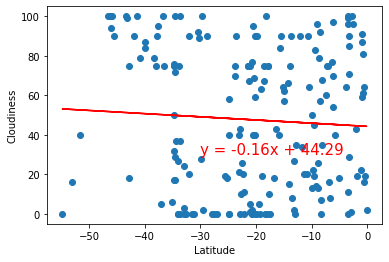

In [30]:
# Starter code example

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

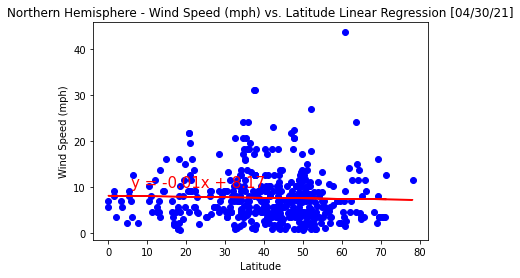

In [41]:
# create scatter plot and linear regression for Northern Hem Wind Speed vs. latitude 
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../Image Output/north_hem_lat_vs_wind.jpg')

plt.show()

Analysis:

The r-value is: 0.04019723576144484


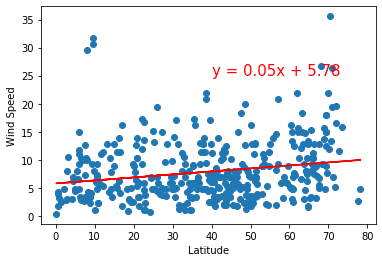

In [31]:
# starter code example

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

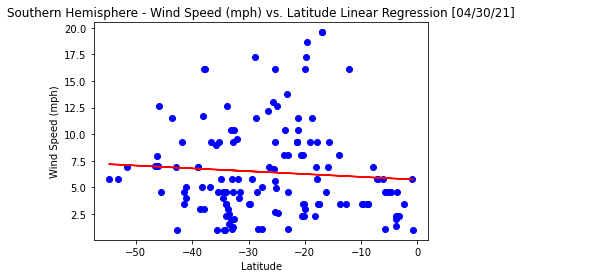

In [42]:
# create scatter plot and linear regression for Southern Hem Wind Speed vs. latitude 
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression [04/30/21]")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../Image Output/south_hem_lat_vs_wind.jpg')

plt.show()

Analysis: 

The r-value is: 0.017128274759839232


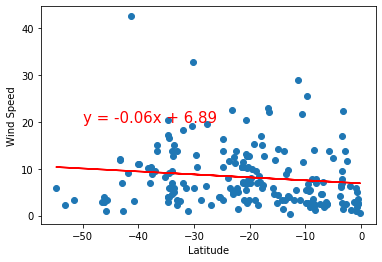

In [32]:
# starter code example